#### Summary 
The data set includes:
-	Malignant: It is the Label column, which includes values 0 and 1, denoting if the comment is malignant or not. 
-	Highly Malignant: It denotes comments that are highly malignant and hurtful. 
-	Rude: It denotes comments that are very rude and offensive.
-	Threat: It contains indication of the comments that are giving any threat to someone. 	
-	Abuse: It is for comments that are abusive in nature. 
-	Loathe: It describes the comments which are hateful and loathing in nature.  
-	ID: It includes unique Ids associated with each comment text given.   
-	Comment text: This column contains the comments extracted from various social media platforms. 
This project is more about exploration, feature engineering and classification that can be done on this data. Since the data set is huge and includes many categories of comments, we can do good amount of data exploration and derive some interesting features using the comments text column available. 
We need to build a model that can differentiate between comments and its categories.  


In [1]:
import numpy as np
import pandas as pd

In [2]:
import sys

In [3]:
sys.setrecursionlimit(10**6)

In [4]:
df=pd.read_csv("train.csv")
df.head()

,id,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


In [5]:
df.isnull().sum()
# There are no null values in the dataset

id                  0
comment_text        0
malignant           0
highly_malignant    0
rude                0
threat              0
abuse               0
loathe              0
dtype: int64

In [6]:
# Shape of the dataset
df.shape
# There are 159571 rows and eight columns in the dataset

(159571, 8)

In [7]:
# info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159571 entries, 0 to 159570
Data columns (total 8 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   id                159571 non-null  object
 1   comment_text      159571 non-null  object
 2   malignant         159571 non-null  int64 
 3   highly_malignant  159571 non-null  int64 
 4   rude              159571 non-null  int64 
 5   threat            159571 non-null  int64 
 6   abuse             159571 non-null  int64 
 7   loathe            159571 non-null  int64 
dtypes: int64(6), object(2)
memory usage: 9.7+ MB


In [8]:
df['malignant'].value_counts()

0    144277
1     15294
Name: malignant, dtype: int64

In [9]:
df['highly_malignant'].value_counts()

0    157976
1      1595
Name: highly_malignant, dtype: int64

In [10]:
df['rude'].value_counts()

0    151122
1      8449
Name: rude, dtype: int64

In [11]:
df['threat'].value_counts()

0    159093
1       478
Name: threat, dtype: int64

In [12]:
df['abuse'].value_counts()

0    151694
1      7877
Name: abuse, dtype: int64

In [13]:
df['loathe'].value_counts()

0    158166
1      1405
Name: loathe, dtype: int64

In [14]:
df_normal=df[(df['abuse']== 0) & (df['threat']== 0) & (df['malignant']== 0) & (df['highly_malignant']== 0) & (df['rude'] == 0) & (df['loathe'] == 0)]
df_normal

,id,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0
...,...,...,...,...,...,...,...,...
159566,ffe987279560d7ff,""":::::And for the second time of asking, when ...",0,0,0,0,0,0
159567,ffea4adeee384e90,You should be ashamed of yourself \n\nThat is ...,0,0,0,0,0,0
159568,ffee36eab5c267c9,"Spitzer \n\nUmm, theres no actual article for ...",0,0,0,0,0,0
159569,fff125370e4aaaf3,And it looks like it was actually you who put ...,0,0,0,0,0,0


In [15]:
# There are 143346 datapoints which are normal and without any of the negative labels. So we have a highly imbalanced dataset.

In [16]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

/usr/local/lib/python3.6/dist-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


In [19]:
sia=SentimentIntensityAnalyzer()

In [18]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [20]:
df_normal1000=df_normal.iloc[:1000,:]

In [21]:
for i in df_normal1000['comment_text']:
    print(i)
    print(sia.polarity_scores(i))

Explanation
Why the edits made under my username Hardcore Metallica Fan were reverted? They weren't vandalisms, just closure on some GAs after I voted at New York Dolls FAC. And please don't remove the template from the talk page since I'm retired now.89.205.38.27
{'neg': 0.0, 'neu': 0.897, 'pos': 0.103, 'compound': 0.5574}
D'aww! He matches this background colour I'm seemingly stuck with. Thanks.  (talk) 21:51, January 11, 2016 (UTC)
{'neg': 0.099, 'neu': 0.743, 'pos': 0.158, 'compound': 0.2942}
Hey man, I'm really not trying to edit war. It's just that this guy is constantly removing relevant information and talking to me through edits instead of my talk page. He seems to care more about the formatting than the actual info.
{'neg': 0.083, 'neu': 0.849, 'pos': 0.068, 'compound': -0.1779}
"
More
I can't make any real suggestions on improvement - I wondered if the section statistics should be later on, or a subsection of ""types of accidents""  -I think the references may need tidying s

In [22]:
# By observing the above polarity scores, we can notice that majority are of neutral scores, hence, it is not labelled negative

In [23]:
#! pip install wordcloud

In [24]:
from wordcloud import STOPWORDS, WordCloud

In [25]:
import string

In [26]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
ps=PorterStemmer()

In [27]:
dfcopy=df['comment_text'].iloc[:100]
dfcopy

0     Explanation\nWhy the edits made under my usern...
1     D'aww! He matches this background colour I'm s...
2     Hey man, I'm really not trying to edit war. It...
3     "\nMore\nI can't make any real suggestions on ...
4     You, sir, are my hero. Any chance you remember...
                            ...                        
95    "\n\nThanks. I can see that violating clearly ...
96    "\nHi\nThanks for our kind words. See you arou...
97    Collusion in poker \n\nThis is regarded as mos...
98    Thanks much - however, if it's been resolved, ...
99    You can do all you're doing right now but if y...
Name: comment_text, Length: 100, dtype: object

In [30]:
# We need to clean the dataset
cleaned_dataset=[]
for i in df['comment_text']:
    cleaned_text=i.split()
    cleaned_text=[i.lower() for i in cleaned_text]
    cleaned_text=[re.sub(r'[\n]','',i)for i in cleaned_text]
    cleaned_text=[re.sub(r'[^a-zA-Z]','',i)for i in cleaned_text]
    cleaned_text=[j for j in cleaned_text if j not in stopwords.words('english')]
    cleaned_text=[ps.stem(k) for k in cleaned_text]
    cleaned_text=(' ').join(cleaned_text)
    cleaned_dataset.append(cleaned_text)
    
    

In [29]:
nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping corpora/biocreative_ppi.zip.
[nltk_data]    | Downloading package brown to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/brown.zip.
[nltk_data]    | Downloading package brown_tei to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/brown_tei.zip.
[nltk_data]    | Downloading package cess_cat to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/cess_cat.zip.
[nltk_data]    | Downloading package cess_esp to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/cess_esp.zip.
[nltk_data]    | Downloading package chat80 to /root/nltk_data...
[nltk_data]    |   Unzipp

True

In [31]:
cleaned_dataset

['explan edit made usernam hardcor metallica fan revert werent vandal closur ga vote new york doll fac pleas dont remov templat talk page sinc im retir',
 'daww match background colour im seemingli stuck thank talk  januari   utc',
 'hey man im realli tri edit war guy constantli remov relev inform talk edit instead talk page seem care format actual info',
 ' cant make real suggest improv  wonder section statist later subsect type accid think refer may need tidi exact format ie date format etc later noon els first  prefer format style refer want pleas let know appear backlog articl review guess may delay review turn list relev form eg wikipediagoodarticlenominationstransport ',
 'sir hero chanc rememb page that',
 ' congratul well use tool well  talk ',
 'cocksuck piss around work',
 'vandal matt shirvington articl revert pleas dont ban',
 'sorri word nonsens offens anyway im intend write anyth articlewow would jump vandal im mere request encycloped one use school refer select breed pag

In [32]:
len(cleaned_dataset)

159571

In [33]:
df['cleaned_text']=cleaned_dataset

In [34]:
df.head()

,id,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe,cleaned_text
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0,explan edit made usernam hardcor metallica fan...
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0,daww match background colour im seemingli stuc...
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0,hey man im realli tri edit war guy constantli ...
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0,cant make real suggest improv wonder section...
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0,sir hero chanc rememb page that


In [35]:
dfnew=df.iloc[:,2:]
dfnew.head()

,malignant,highly_malignant,rude,threat,abuse,loathe,cleaned_text
0,0,0,0,0,0,0,explan edit made usernam hardcor metallica fan...
1,0,0,0,0,0,0,daww match background colour im seemingli stuc...
2,0,0,0,0,0,0,hey man im realli tri edit war guy constantli ...
3,0,0,0,0,0,0,cant make real suggest improv wonder section...
4,0,0,0,0,0,0,sir hero chanc rememb page that


In [36]:
dfnew[(dfnew['malignant']==1) & (dfnew['highly_malignant']==1)]
# There are values where texts are multi labelled 

,malignant,highly_malignant,rude,threat,abuse,loathe,cleaned_text
6,1,1,1,0,1,0,cocksuck piss around work
55,1,1,1,0,1,0,stupid peac shit stop delet stuff asshol go di...
181,1,1,1,0,1,0,stupid fuck mother cunt stink
442,1,1,1,0,1,0,hi im fuck bitch
579,1,1,1,0,1,0,motherfuck piec crap fuckhead block us
...,...,...,...,...,...,...,...
159096,1,1,1,0,1,0,filthi stink crow back dirti crow better delet...
159099,1,1,1,0,1,0,fuck pathet moron cc jimbo wale rootmyass
159281,1,1,1,0,1,1,lol your gay never know good feel fuck woman ass
159312,1,1,1,0,1,0,walter mercado antonio quit frankli your fucke...


In [37]:
dfnew[(dfnew['malignant']==1) & (dfnew['highly_malignant']==1) & (dfnew['rude']==1) ]
# 1517 values are tagged by tags malignant and highly malignant

,malignant,highly_malignant,rude,threat,abuse,loathe,cleaned_text
6,1,1,1,0,1,0,cocksuck piss around work
55,1,1,1,0,1,0,stupid peac shit stop delet stuff asshol go di...
181,1,1,1,0,1,0,stupid fuck mother cunt stink
442,1,1,1,0,1,0,hi im fuck bitch
579,1,1,1,0,1,0,motherfuck piec crap fuckhead block us
...,...,...,...,...,...,...,...
159096,1,1,1,0,1,0,filthi stink crow back dirti crow better delet...
159099,1,1,1,0,1,0,fuck pathet moron cc jimbo wale rootmyass
159281,1,1,1,0,1,1,lol your gay never know good feel fuck woman ass
159312,1,1,1,0,1,0,walter mercado antonio quit frankli your fucke...


In [38]:
dfnew[(dfnew['malignant']==1) & (dfnew['highly_malignant']==1) & (dfnew['rude']==1) & (dfnew['abuse']==1)]
# 1349 rows are being labelled by three tags, malignant, highly_malignant, rude and abuse

,malignant,highly_malignant,rude,threat,abuse,loathe,cleaned_text
6,1,1,1,0,1,0,cocksuck piss around work
55,1,1,1,0,1,0,stupid peac shit stop delet stuff asshol go di...
181,1,1,1,0,1,0,stupid fuck mother cunt stink
442,1,1,1,0,1,0,hi im fuck bitch
579,1,1,1,0,1,0,motherfuck piec crap fuckhead block us
...,...,...,...,...,...,...,...
159096,1,1,1,0,1,0,filthi stink crow back dirti crow better delet...
159099,1,1,1,0,1,0,fuck pathet moron cc jimbo wale rootmyass
159281,1,1,1,0,1,1,lol your gay never know good feel fuck woman ass
159312,1,1,1,0,1,0,walter mercado antonio quit frankli your fucke...


In [39]:
dfnew[(dfnew['malignant']==1) & (dfnew['highly_malignant']==1) & (dfnew['rude']==1) & (dfnew['abuse']==1)& (dfnew['threat']==1)]
# 95 rows are labelled by 5 tags, malignant, highly_malignant, rude, threat and abuse

,malignant,highly_malignant,rude,threat,abuse,loathe,cleaned_text
1017,1,1,1,1,1,1,wouldnt first time bitch fuck ill find live so...
1312,1,1,1,1,1,1,shut fat poop kick ass
2894,1,1,1,1,1,0,go die son bich
4712,1,1,1,1,1,0,go fuck bastard yyou life go fuck bastard yank...
5569,1,1,1,1,1,0,dare send abus fuck cockmast dare warn mr jeff...
...,...,...,...,...,...,...,...
155722,1,1,1,1,1,0,come ducttak rape till die fuckhead
157428,1,1,1,1,1,1,ok bitch swear god fuckin beat face itz n popp...
157631,1,1,1,1,1,0,want wanna rape good want sexi bodi sexual abus
158856,1,1,1,1,1,0,hey hey faggot dead yet watch mom get rape fil...


In [40]:
dfnew[(dfnew['malignant']==1) & (dfnew['highly_malignant']==1) & (dfnew['rude']==1) & (dfnew['abuse']==1) & (dfnew['threat']==1)& (dfnew['loathe']==1)]
# There are 31 values which are labelled by all the tags

,malignant,highly_malignant,rude,threat,abuse,loathe,cleaned_text
1017,1,1,1,1,1,1,wouldnt first time bitch fuck ill find live so...
1312,1,1,1,1,1,1,shut fat poop kick ass
7299,1,1,1,1,1,1,your stupid cunt fuck dumb ars mum hairi cunt ...
13648,1,1,1,1,1,1,bitch littl bitch fuckin spent hour big sam r...
13964,1,1,1,1,1,1,go murder zimzalabim st evil homosexu jew
22158,1,1,1,1,1,1,fuck fuck nigger bag shit hope die horribl fir...
29968,1,1,1,1,1,1,u motherfukkin bitch want rape smelli whore st...
32098,1,1,1,1,1,1,fuck asyriac nation qamishli belong arminian f...
33951,1,1,1,1,1,1,go fuck bitch hate sould mother fucker hell th...
38513,1,1,1,1,1,1,go rape ass fat bitch wheelchairi go rape ass ...


In [41]:
dfnewnormal=dfnew[(dfnew['abuse']==0) & (dfnew['highly_malignant']==0) & (dfnew['loathe']==0) & (dfnew['malignant']==0) & (dfnew['rude']==0) & (dfnew['threat']==0)]
dfnewnormal

,malignant,highly_malignant,rude,threat,abuse,loathe,cleaned_text
0,0,0,0,0,0,0,explan edit made usernam hardcor metallica fan...
1,0,0,0,0,0,0,daww match background colour im seemingli stuc...
2,0,0,0,0,0,0,hey man im realli tri edit war guy constantli ...
3,0,0,0,0,0,0,cant make real suggest improv wonder section...
4,0,0,0,0,0,0,sir hero chanc rememb page that
...,...,...,...,...,...,...,...
159566,0,0,0,0,0,0,second time ask view complet contradict covera...
159567,0,0,0,0,0,0,asham horribl thing put talk page
159568,0,0,0,0,0,0,spitzer umm there actual articl prostitut ring...
159569,0,0,0,0,0,0,look like actual put speedi first version dele...


In [42]:
# Lets check what appears most in the normal data
wordcloud=WordCloud(width=400,height=400,max_words=300).generate(str(dfnewnormal['cleaned_text']))

In [43]:
import matplotlib.pyplot as plt

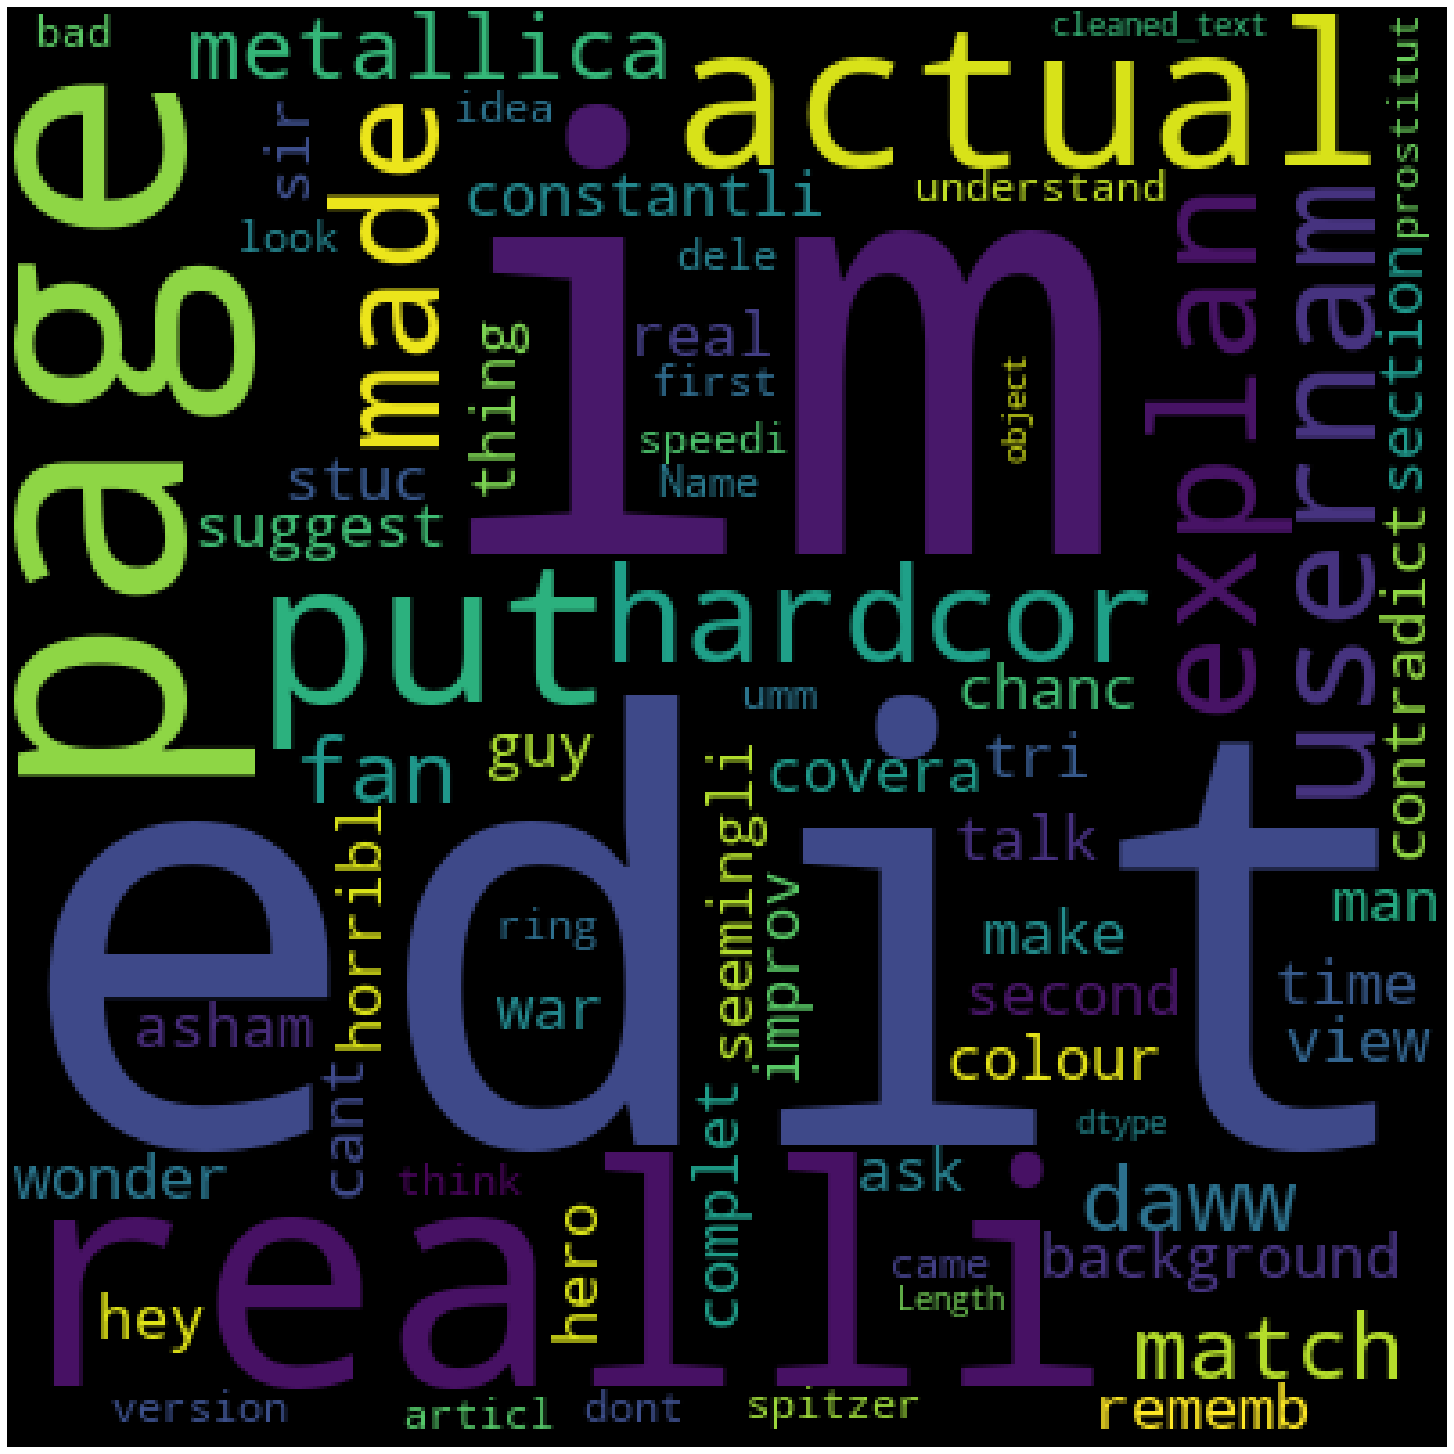

In [44]:
# plot the wordcloud image
plt.figure(figsize=(20,20),facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

In [45]:
# Observation:
# By observing the wordcloud of normal data, we can make out that all normal data contains normal words only.

In [46]:
# Now lets the wordcloud for each label separately
df_abuse=dfnew[(dfnew['abuse']==1)]
df_abuse.head()

,malignant,highly_malignant,rude,threat,abuse,loathe,cleaned_text
6,1,1,1,0,1,0,cocksuck piss around work
42,1,0,1,0,1,1,gay antisemmitian archangel white tiger meow g...
43,1,0,1,0,1,0,fuck filthi mother ass dri
55,1,1,1,0,1,0,stupid peac shit stop delet stuff asshol go di...
56,1,0,1,0,1,0,toni sidaway obvious fistfucke love arm ass


In [47]:
df_malignant=dfnew[(dfnew['malignant']==1)]
df_malignant

,malignant,highly_malignant,rude,threat,abuse,loathe,cleaned_text
6,1,1,1,0,1,0,cocksuck piss around work
12,1,0,0,0,0,0,hey talk exclus group wp talibanswho good d...
16,1,0,0,0,0,0,bye dont look come think com back tosser
42,1,0,1,0,1,1,gay antisemmitian archangel white tiger meow g...
43,1,0,1,0,1,0,fuck filthi mother ass dri
...,...,...,...,...,...,...,...
159494,1,0,1,0,1,1,previou convers fuck shit eat liber make ladi...
159514,1,0,0,0,1,0,mischievi pubic hair
159541,1,0,1,0,1,0,absurd edit absurd edit great white shark tota...
159546,1,0,0,0,1,0,hey listen dont ever delet edit ever im annoy...


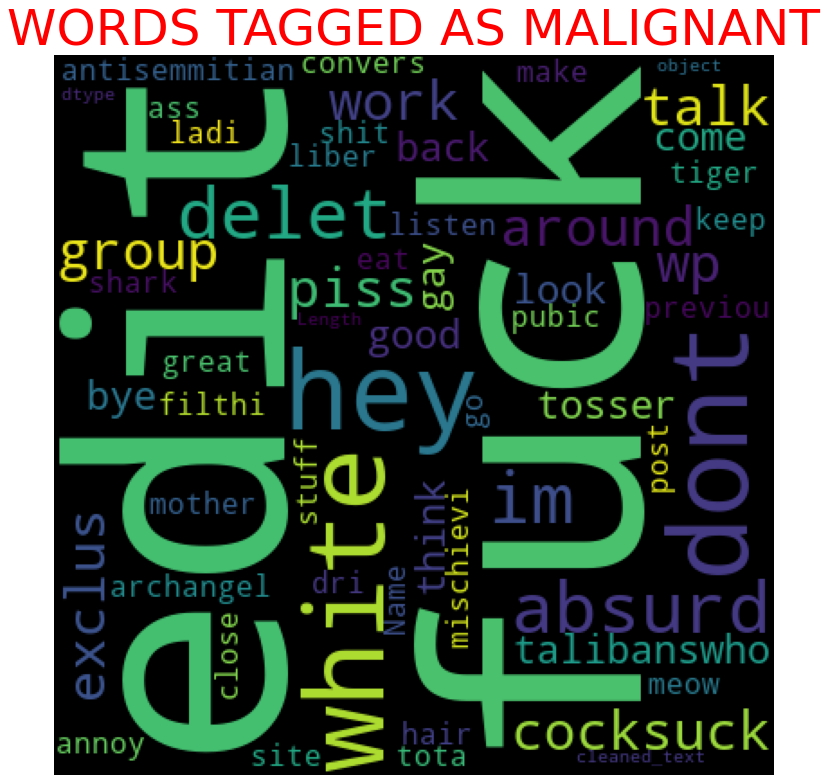

In [48]:
wordcloud=WordCloud(height=400,width=400,max_words=400).generate(str(df_malignant['cleaned_text']))
plt.figure(figsize=(10,10))
plt.imshow(wordcloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.title(label='WORDS TAGGED AS MALIGNANT',fontdict={'fontsize':50, 'fontweight':50, 'color':'red'})
plt.show()

In [49]:
df_highlymalignant=dfnew[(dfnew['highly_malignant']==1)]
df_highlymalignant

,malignant,highly_malignant,rude,threat,abuse,loathe,cleaned_text
6,1,1,1,0,1,0,cocksuck piss around work
55,1,1,1,0,1,0,stupid peac shit stop delet stuff asshol go di...
181,1,1,1,0,1,0,stupid fuck mother cunt stink
442,1,1,1,0,1,0,hi im fuck bitch
579,1,1,1,0,1,0,motherfuck piec crap fuckhead block us
...,...,...,...,...,...,...,...
159096,1,1,1,0,1,0,filthi stink crow back dirti crow better delet...
159099,1,1,1,0,1,0,fuck pathet moron cc jimbo wale rootmyass
159281,1,1,1,0,1,1,lol your gay never know good feel fuck woman ass
159312,1,1,1,0,1,0,walter mercado antonio quit frankli your fucke...


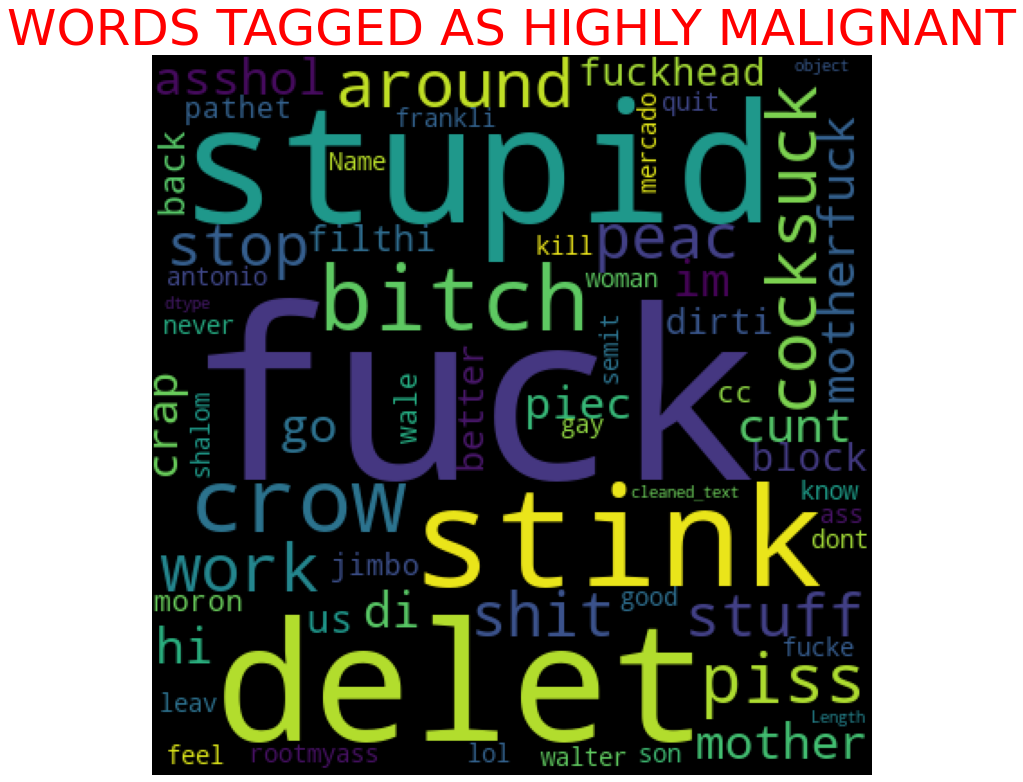

In [50]:
wordcloud=WordCloud(height=400,width=400,max_words=400).generate(str(df_highlymalignant['cleaned_text']))
plt.figure(figsize=(10,10))
plt.imshow(wordcloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.title(label='WORDS TAGGED AS HIGHLY MALIGNANT',fontdict={'fontsize':50, 'fontweight':50, 'color':'red'})
plt.show()

In [51]:
df_rude=dfnew[(dfnew['rude']==1)]
df_rude

,malignant,highly_malignant,rude,threat,abuse,loathe,cleaned_text
6,1,1,1,0,1,0,cocksuck piss around work
42,1,0,1,0,1,1,gay antisemmitian archangel white tiger meow g...
43,1,0,1,0,1,0,fuck filthi mother ass dri
51,1,0,1,0,0,0,get fuck get fuckee got drink cant put get fuc...
55,1,1,1,0,1,0,stupid peac shit stop delet stuff asshol go di...
...,...,...,...,...,...,...,...
159411,1,0,1,0,1,0,fat piec shit obes piec shit thought nake last...
159493,1,0,1,0,1,0,fuck faggot lolwat
159494,1,0,1,0,1,1,previou convers fuck shit eat liber make ladi...
159541,1,0,1,0,1,0,absurd edit absurd edit great white shark tota...


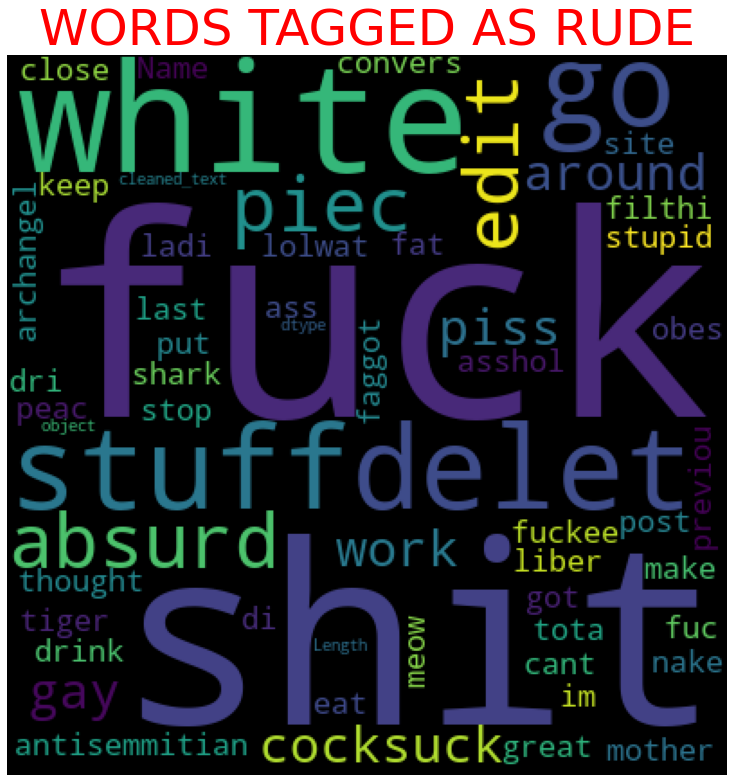

In [52]:
wordcloud=WordCloud(height=400,width=400,max_words=400).generate(str(df_rude['cleaned_text']))
plt.figure(figsize=(10,10))
plt.imshow(wordcloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.title(label='WORDS TAGGED AS RUDE',fontdict={'fontsize':50, 'fontweight':50, 'color':'red'})
plt.show()

In [53]:
df_threat=dfnew[(dfnew['threat']==1)]
df_threat

,malignant,highly_malignant,rude,threat,abuse,loathe,cleaned_text
79,1,0,0,1,0,0,hi back last warn stop undo edit die
176,1,0,1,1,1,1,think fagget get oif burn hell hate sorri cant...
600,1,0,0,1,0,0,im also sock puppet accountsupris sincer man t...
802,1,0,1,1,1,0,fuck smith pleas notifi die want danc grave
1017,1,1,1,1,1,1,wouldnt first time bitch fuck ill find live so...
...,...,...,...,...,...,...,...
157718,1,0,1,1,1,1,bitch fuck hore suck dick big ass hole gay fag...
158717,1,0,1,1,1,0,stupid head dumb stupid die die die go suck butt
158856,1,1,1,1,1,0,hey hey faggot dead yet watch mom get rape fil...
159029,1,0,0,1,0,1,death musulman


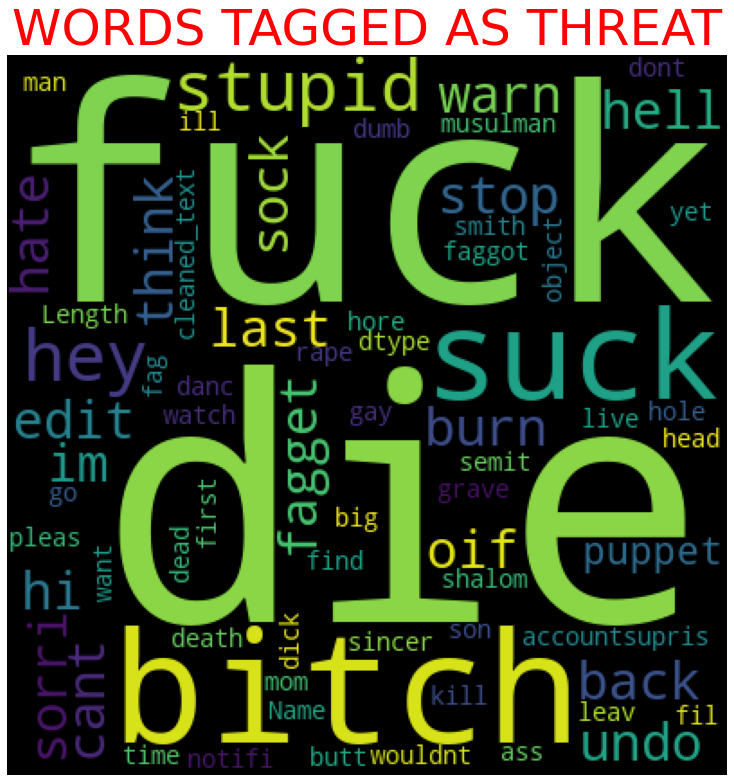

In [54]:
wordcloud=WordCloud(height=400,width=400,max_words=400).generate(str(df_threat['cleaned_text']))
plt.figure(figsize=(10,10))
plt.imshow(wordcloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.title(label='WORDS TAGGED AS THREAT',fontdict={'fontsize':50, 'fontweight':50, 'color':'red'})
plt.show()

In [55]:
df_loathe=dfnew[(dfnew['loathe']==1)]
df_loathe

,malignant,highly_malignant,rude,threat,abuse,loathe,cleaned_text
42,1,0,1,0,1,1,gay antisemmitian archangel white tiger meow g...
105,1,0,1,0,1,1,pair jewhat weiner nazi schmuck
176,1,0,1,1,1,1,think fagget get oif burn hell hate sorri cant...
218,1,0,1,0,1,1,kill nigger hard other said includ racist some...
238,1,0,1,0,1,1,u r tw fuck u gay boyu r smellyfuck ur mum poopi
...,...,...,...,...,...,...,...
159281,1,1,1,0,1,1,lol your gay never know good feel fuck woman ass
159336,1,0,1,0,1,1,oh fuck pansi jew would whine bnai brith beat ...
159400,1,1,1,1,1,1,shalom semit get fuck kill son bitch dont leav...
159449,1,0,0,0,0,1,think gay fag


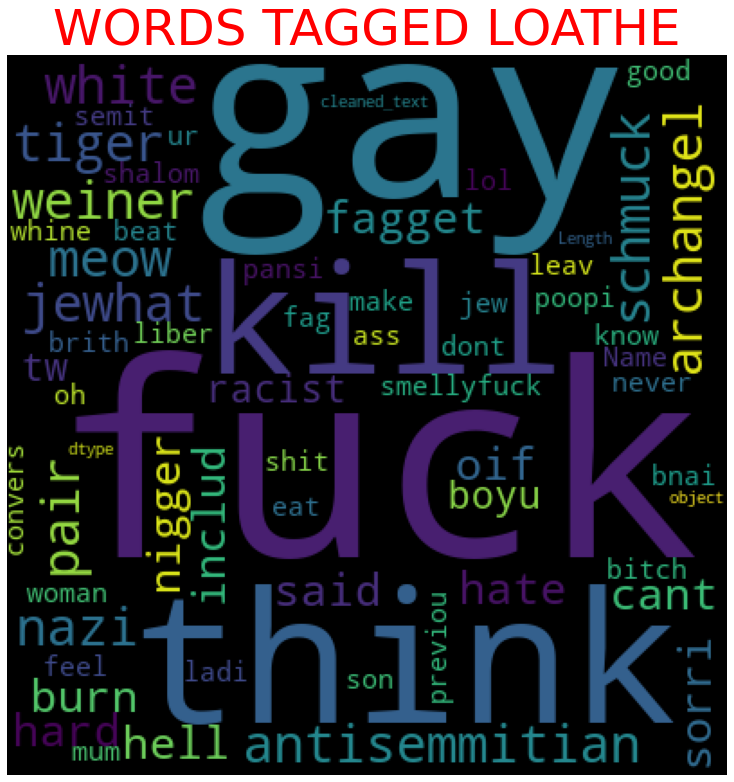

In [56]:
wordcloud=WordCloud(height=400,width=400,max_words=400).generate(str(df_loathe['cleaned_text']))
plt.figure(figsize=(10,10))
plt.imshow(wordcloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.title(label='WORDS TAGGED LOATHE',fontdict={'fontsize':50, 'fontweight':50, 'color':'red'})
plt.show()

In [57]:
# Lets apply tfidf to the text data for converting it into number vectors
from sklearn.feature_extraction.text import TfidfVectorizer
vect=TfidfVectorizer()

In [58]:
X_dfnew=vect.fit_transform(dfnew['cleaned_text'])

In [59]:
Y=dfnew.iloc[:,0:6]
Y.head()

,malignant,highly_malignant,rude,threat,abuse,loathe
0,0,0,0,0,0,0
1,0,0,0,0,0,0
2,0,0,0,0,0,0
3,0,0,0,0,0,0
4,0,0,0,0,0,0


In [60]:
from sklearn.model_selection import train_test_split
train_x,test_x,train_y,test_y=train_test_split(X_dfnew,Y,random_state=0,test_size=0.20)

In [61]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.multioutput import MultiOutputClassifier


In [62]:
forest=RandomForestClassifier(random_state=1)
multi_target_forest=MultiOutputClassifier(forest)

In [63]:
multi_target_forest.fit(train_x,train_y)
pred=multi_target_forest.predict(test_x)

In [64]:
pred=multi_target_forest.predict(test_x)

In [65]:
from sklearn.metrics import hamming_loss, accuracy_score
print("Accuracy Score", accuracy_score(pred,test_y))
print("Hamming Loss", hamming_loss(pred,test_y))

Accuracy Score 0.9132069559768135
Hamming Loss 0.021677372186537158


In [66]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(pred,test_y))

              precision    recall  f1-score   support

           0       0.52      0.93      0.67      1748
           1       0.05      0.50      0.10        36
           2       0.60      0.90      0.72      1123
           3       0.04      0.57      0.08         7
           4       0.44      0.81      0.57       870
           5       0.09      0.90      0.16        30

   micro avg       0.48      0.89      0.62      3814
   macro avg       0.29      0.77      0.38      3814
weighted avg       0.52      0.89      0.65      3814
 samples avg       0.04      0.05      0.04      3814



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [68]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import LinearSVC
pred=OneVsRestClassifier(LinearSVC(random_state=0)).fit(train_x,train_y).predict(test_x)

In [69]:
classifier=OneVsRestClassifier(LinearSVC(random_state=0))
classifier.fit(train_x,train_y)
classifier.predict(test_x)

array([[0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       ...,
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0]])

In [70]:
print("Accuracy Score", accuracy_score(pred,test_y))
print("Hamming Loss", hamming_loss(pred,test_y))

Accuracy Score 0.9176876077079743
Hamming Loss 0.018789492923912476


In [71]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(pred,test_y))


              precision    recall  f1-score   support

           0       0.68      0.88      0.77      2388
           1       0.23      0.51      0.32       152
           2       0.70      0.88      0.78      1348
           3       0.14      0.65      0.23        20
           4       0.55      0.77      0.64      1137
           5       0.28      0.65      0.39       126

   micro avg       0.61      0.84      0.71      5171
   macro avg       0.43      0.72      0.52      5171
weighted avg       0.63      0.84      0.72      5171
 samples avg       0.06      0.06      0.06      5171



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
#  So we can save the model and give predictions to the new test data there


In [72]:
# Cleaning the dftest text

In [74]:
dftest=pd.read_csv('test.csv')

In [76]:
cleaned_testdataset=[]
for i in dftest['comment_text']:
    cleaned_text=i.split()
    cleaned_text=[i.lower() for i in cleaned_text]
    cleaned_text=[re.sub(r'[\n]','',i)for i in cleaned_text]
    cleaned_text=[re.sub(r'[^a-zA-Z]','',i)for i in cleaned_text]
    cleaned_text=[j for j in cleaned_text if j not in stopwords.words('english')]
    cleaned_text=[ps.stem(k) for k in cleaned_text]
    cleaned_text=(' ').join(cleaned_text)
    cleaned_testdataset.append(cleaned_text)
    
    

In [77]:
dftest['cleaned_comment']=cleaned_testdataset

In [78]:
X_test=vect.transform(dftest['cleaned_comment'])

In [ ]:
# Making predictions

In [81]:
predictions=classifier.predict(X_test)
predictiondf=pd.DataFrame(predictions)


In [84]:
predictiondf.to_csv("Malignant_Comments_predictions", index=False,header=False)

In [82]:
# Saving the model 
# Linear SVC with OneVSRest is giving better results so lets finalize the sae
from sklearn.externals import joblib
joblib.dump(classifier,"malignant_comments.pkl")

/usr/local/lib/python3.6/dist-packages/sklearn/externals/joblib/__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


['malignant_comments.pkl']